<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/UTS/UTS_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/diabetes_012_health_indicators_BRFSS2015.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [ ]:
# Jumlah Baris dan kolom
df.shape

(253680, 22)

In [ ]:
# Nama-nama Kolom
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Tipe data
df.dtypes

,0
Diabetes_012,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


In [ ]:
# Deskripsi Statistic
df.describe().loc[['min','50%','mean','max','std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Diabetes_012,0.000000,0.000000,0.296921,2.000000,0.698160
HighBP,0.000000,0.000000,0.429001,1.000000,0.494934
HighChol,0.000000,0.000000,0.424121,1.000000,0.494210
CholCheck,0.000000,1.000000,0.962670,1.000000,0.189571
BMI,12.000000,27.000000,28.382364,98.000000,6.608694
Smoker,0.000000,0.000000,0.443169,1.000000,0.496761
Stroke,0.000000,0.000000,0.040571,1.000000,0.197294
HeartDiseaseorAttack,0.000000,0.000000,0.094186,1.000000,0.292087
PhysActivity,0.000000,1.000000,0.756544,1.000000,0.429169
Fruits,0.000000,1.000000,0.634256,1.000000,0.481639


In [ ]:
# Melakukan pengecheckan pada nilai NULL
missing_values = df.isnull().sum()

missing_values

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(229781, 22)

<ipython-input-24-e461fa6f61b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Diabetes_012'], palette='pastel')


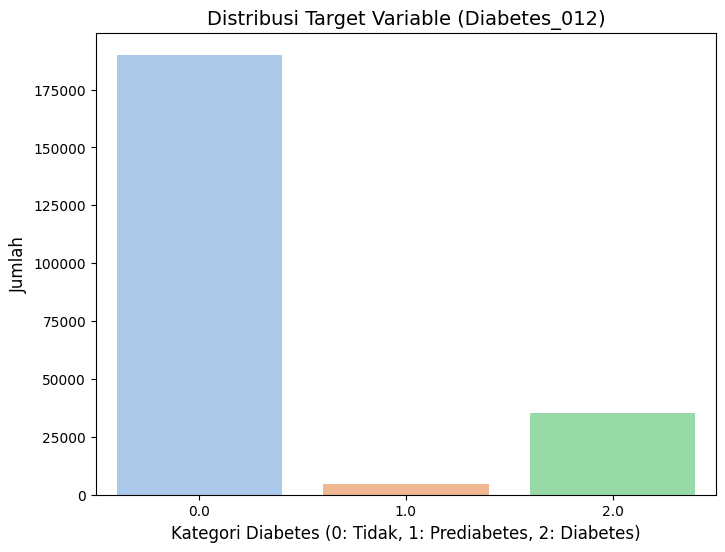

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Distribusi Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Diabetes_012'], palette='pastel')
plt.title('Distribusi Target Variable (Diabetes_012)', fontsize=14)
plt.xlabel('Kategori Diabetes (0: Tidak, 1: Prediabetes, 2: Diabetes)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Kategori 0 (Tidak Diabetes) adalah mayoritas.

Kategori 1 (Prediabetes) sangat kecil, yang menunjukkan ketidakseimbangan kelas (class imbalance).

Kategori 2 (Diabetes) cukup signifikan.

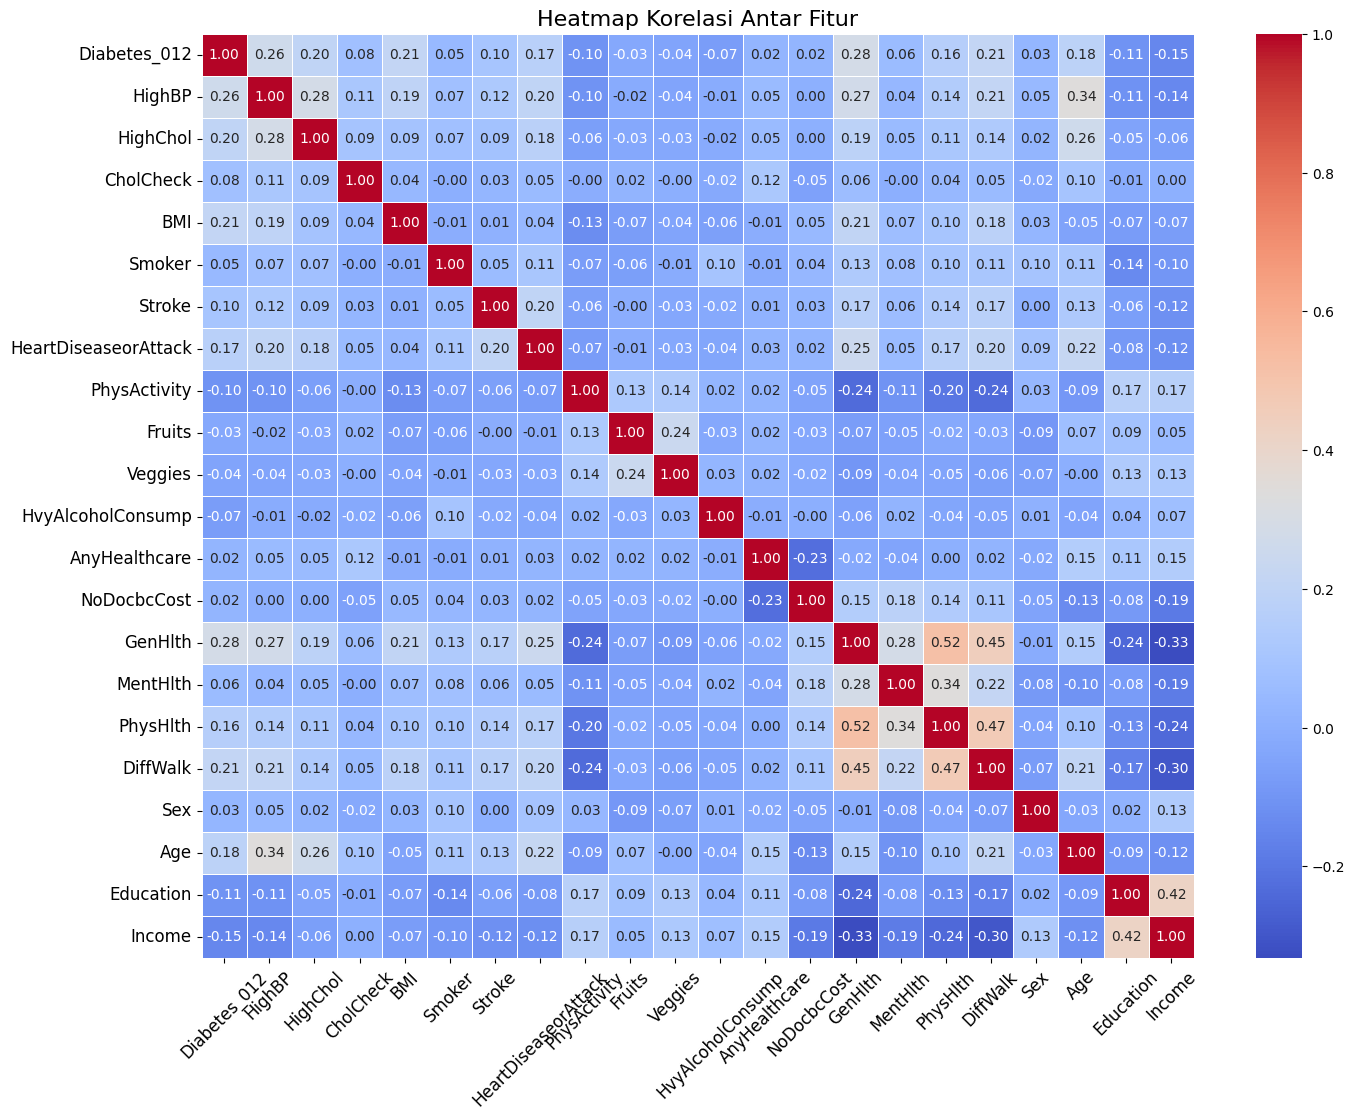

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap Korelasi Antar Fitur
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()  # Menghitung matriks korelasi
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


<ipython-input-26-ce3ce2312305>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diabetes_012'], y=df['BMI'], palette='pastel')


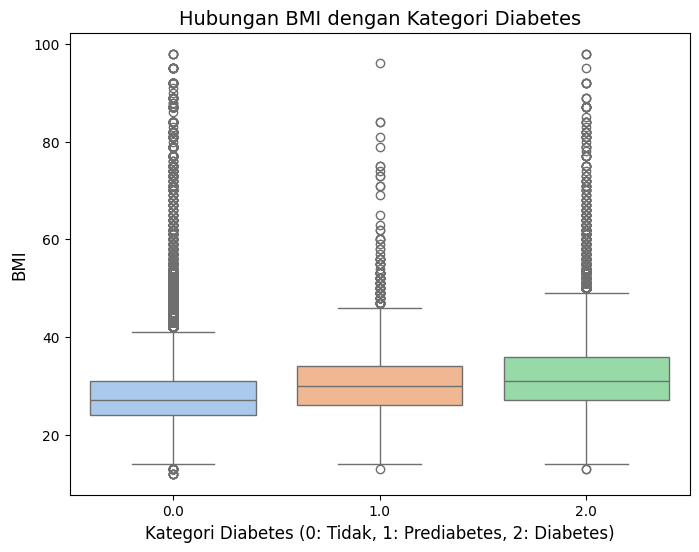

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Hubungan BMI dengan Kategori Diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Diabetes_012'], y=df['BMI'], palette='pastel')
plt.title('Hubungan BMI dengan Kategori Diabetes', fontsize=14)
plt.xlabel('Kategori Diabetes (0: Tidak, 1: Prediabetes, 2: Diabetes)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Peningkatan kategori diabetes (0 → 2) menunjukkan peningkatan median BMI.
Orang dengan diabetes cenderung memiliki BMI yang lebih tinggi dibandingkan dengan kategori lainnya.

<ipython-input-27-4457be03b336>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Diabetes_012'], y=df['Age'], palette='pastel')


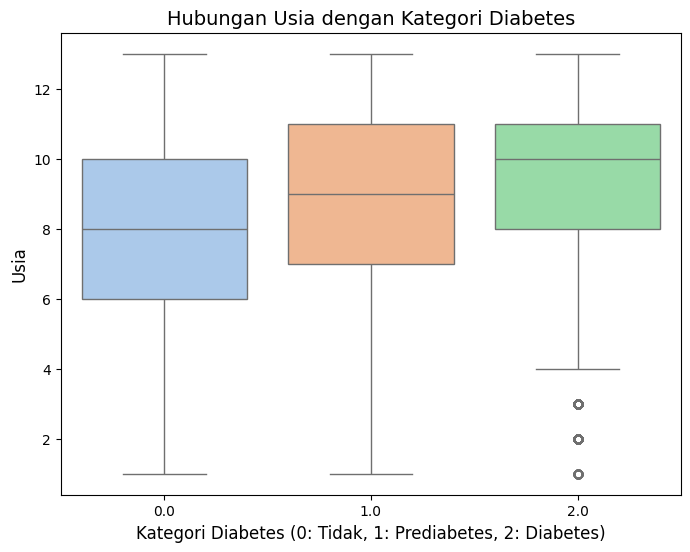

In [ ]:
# Visualisasi Hubungan Usia dengan Kategori Diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Diabetes_012'], y=df['Age'], palette='pastel')
plt.title('Hubungan Usia dengan Kategori Diabetes', fontsize=14)
plt.xlabel('Kategori Diabetes (0: Tidak, 1: Prediabetes, 2: Diabetes)', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Usia median meningkat dari kategori 0 ke kategori 2, menunjukkan bahwa usia adalah faktor penting untuk diabetes.
Orang dengan diabetes (kategori 2) cenderung lebih tua.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Pisahkan Feature dan Target
X = df.drop(columns=['Diabetes_012'])  # Feature
y = df['Diabetes_012']  # Target

In [ ]:
# Tangani Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Pisahkan Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_resampled)

In [ ]:
# Standarisasi Data Numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Output bentuk data setelah persiapan
print("Bentuk Data Training:", X_train.shape)
print("Bentuk Data Testing:", X_test.shape)

Bentuk Data Training: (456132, 21)
Bentuk Data Testing: (114033, 21)


SMOTE digunakan untuk menangani ketidakseimbangan kelas.

StandardScaler digunakan untuk standarisasi fitur numerik agar semua fitur memiliki distribusi serupa.

Data dipisahkan menjadi training dan testing dengan rasio 80:20.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62     38011
         1.0       0.44      0.33      0.38     38011
         2.0       0.51      0.60      0.56     38011

    accuracy                           0.53    114033
   macro avg       0.52      0.53      0.52    114033
weighted avg       0.52      0.53      0.52    114033



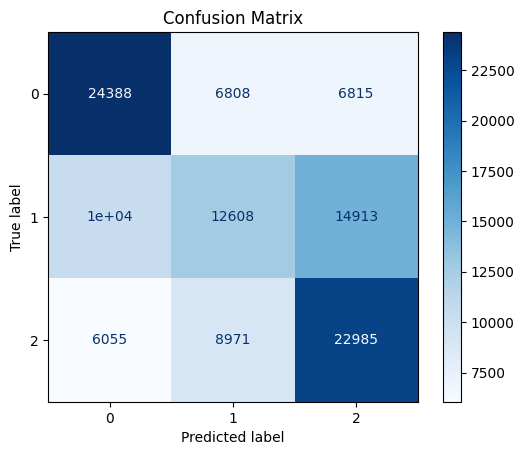

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Membuat Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standarisasi fitur
    ('logistic', LogisticRegression(class_weight='balanced', random_state=42))  # Logistic Regression dengan class_weight
])

# 2. Melatih Model
pipeline.fit(X_train, y_train)

# 3. Evaluasi Model
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logistic__solver': ['liblinear', 'saga'],  # Solver options
    'logistic__penalty': ['l2', 'l1']  # Regularization penalty
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weighted Score:", grid_search.best_score_)

Best Parameters: {'logistic__C': 1, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Best F1 Weighted Score: 0.5254420574411637


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84     38011
         1.0       0.90      0.93      0.91     38011
         2.0       0.80      0.80      0.80     38011

    accuracy                           0.85    114033
   macro avg       0.85      0.85      0.85    114033
weighted avg       0.85      0.85      0.85    114033



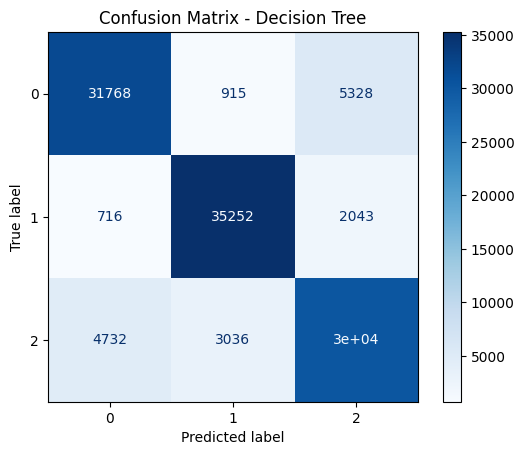

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# 1. Define Pipeline
pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))  # Decision Tree
])

# 2. Fit the model
pipeline.fit(X_train, y_train)

# 3. Evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2]).plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'tree__max_depth': [5, 10, 20, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weighted Score:", grid_search.best_score_)


Best Parameters: {'tree__max_depth': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 5}
Best F1 Weighted Score: 0.8490175676628549


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82     38011
         1.0       0.88      1.00      0.94     38011
         2.0       0.82      0.82      0.82     38011

    accuracy                           0.86    114033
   macro avg       0.86      0.86      0.86    114033
weighted avg       0.86      0.86      0.86    114033



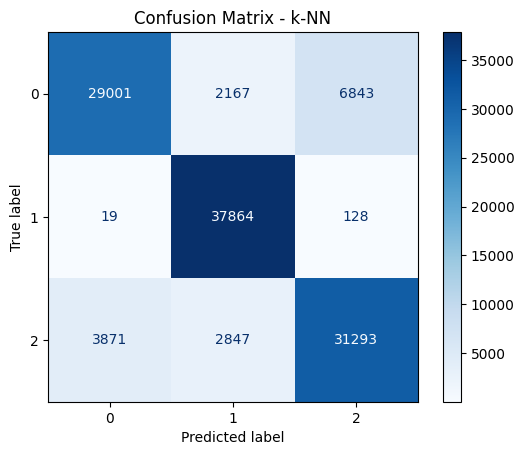

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# 1. Define Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())  # k-NN Classifier
])

# 2. Fit the model
pipeline.fit(X_train, y_train)

# 3. Evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2]).plot(cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga terdekat
    'knn__weights': ['uniform', 'distance'],  # Bobot jarak
    'knn__metric': ['euclidean', 'manhattan']  # Metode pengukuran jarak
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weighted Score:", grid_search.best_score_)
